In [ ]:
from bs4 import BeautifulSoup
import json
import pandas as pd
import requests
import re
import time

# 1.Datos Ventas

In [ ]:
#Cargamos los datos
data = pd.read_csv("venta.csv")
data.head()

,area,rooms,is_new,property_id,garages,stratum,property_type,baths,price,neighbourhood,city
0,72.0,3,False,45bcc478-7d65-4896-a6cd-66885c0078ae,1,Estrato 3,Apartamento,2,2.850000e+08,Rodeo Alto,Medellín
1,135.0,3,False,60311440-7ef3-4907-9f12-c3b35b48f202,1,Estrato 5,Apartamento,2,6.000000e+08,Laureles,Medellín
2,177.0,3,False,ed6a96d9-37f4-4b0d-9f27-e17cd134916e,4,Estrato 6,Apartamento,4,1.380000e+09,San Lucas,Medellín
3,185.0,4,False,fe8c1269-d81a-4395-be89-e5de9ebd811c,1,Estrato 4,Apartamento,4,4.000000e+08,Centro administrativo,Medellín
4,137.0,3,False,231904d6-bd80-4347-84f9-a8b0afcb626c,1,Estrato 5,Apartamento,3,5.600000e+08,Laureles,Medellín


In [ ]:
 data['neighbourhood'].value_counts()

Laureles                          572
El Poblado                        443
Calasanz                          261
Robledo                           153
Castropol                         147
                                 ... 
ACEESS POINT                        1
POBLADO PROVENZA                    1
Oriente Antioqueño V Guayabito      1
aranjuez Berlín                     1
Robledo la aurora                   1
Name: neighbourhood, Length: 935, dtype: int64

In [ ]:
 data['rooms'].value_counts()

3                  3599
4                  1239
2                  1168
Sin especificar     990
5                   360
1                   202
6                   108
7                    49
8                    26
10                   10
9                     8
20                    3
12                    3
11                    3
13                    2
14                    1
17                    1
15                    1
Name: rooms, dtype: int64

In [ ]:
 data['garages'].value_counts()

Sin especificar    3115
1                  2790
2                  1307
3                   281
4                   149
6                    37
5                    35
Más de 10            20
10                   13
8                    13
7                     9
9                     4
Name: garages, dtype: int64

In [ ]:
 data['property_type'].value_counts()

Apartamento       5145
Casa              1435
Oficina            340
Local              338
Lote               141
Apartaestudio      122
Bodega              88
Casa Campestre      54
Finca               50
Edificio            30
Casa Lote           17
Consultorio         12
Cabaña               1
Name: property_type, dtype: int64

# 1.1 Limpieza y Preparación de Datos

In [ ]:
import numpy as np  # matrices y vectores
import matplotlib.pyplot as plt #gráfica
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Seleccionamos los barrios que cuenten con más de 30 registros
value_counts = data['neighbourhood'].value_counts()
valores_a_mantener = value_counts[value_counts >= 30].index.tolist()
data = data[data['neighbourhood'].isin(valores_a_mantener)]

In [ ]:
data['neighbourhood'].unique()

array(['Rodeo Alto', 'Laureles', 'San Lucas', 'Centro administrativo',
       'Belen La Palma', 'La América', 'El Poblado', 'Robledo',
       'San Antonio de Prado', 'Calasanz', 'La Castellana', 'Centro',
       'Los Colores', 'Estadio', 'Florida Nueva', 'Boston',
       'Simon bolivar', 'San Diego', 'Aranjuez', 'La Candelaria',
       'El Tesoro', 'Loma de los bernal', 'Buenos Aires', 'El Campestre',
       'Patio Bonito', 'Santa María de los Ángeles', 'Belén', 'Castropol',
       'La Pilarica', 'Loma del Indio', 'Los Balsos',
       'Belén San Bernardo', 'Urbanizacion doña maria robledo',
       'Los colores', 'La castellana', 'Loma del Escobero', 'Zuñiga',
       'Urbanizacion vegas del poblado', 'Santa maria de los angeles',
       'Loma de los Gonzalez', 'Las Palmas', 'Milla de Oro',
       'Los balsos no.2', 'Belén Fatima', 'San Javier', 'Conquistadores',
       'San diego', 'Las palmas', 'La aguacatala', 'San lucas',
       'La florida', 'El tesoro', 'Loma de los Bernal', 'Belén

In [ ]:
#Procesamiento de datos nulos
data = data[data['rooms'] != 'Sin especificar']
data = data[data['baths'] != 'Sin especificar']
data = data.drop('property_id', axis=1)
data['garages'] = data['garages'].replace('Sin especificar', '0')
data['garages'] = data['garages'].replace('Más de 10', '11')

#Corrección de Tipos de variables
data['area']=data['area'].astype('int64')
data['rooms']=data['rooms'].astype('int64')
data['garages']=data['garages'].astype('int64')
data['property_type']=data['property_type'].astype('category')
data['stratum']=data['stratum'].astype('category')
data['baths']=data['baths'].astype('int64')
data['price']=data['price'].astype('int64')
data['neighbourhood']=data['neighbourhood'].astype('category')
data['city']=data['city'].astype('category')



In [ ]:
opciones_permitidas = ['Apartamento', 'Casa', 'Apartaestudio']
data = data[data['property_type'].isin(opciones_permitidas)]
data['property_type'].unique()

['Apartamento', 'Apartaestudio', 'Casa']
Categories (7, object): ['Apartaestudio', 'Apartamento', 'Casa', 'Casa Campestre', 'Casa Lote', 'Finca',
                         'Lote']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4164 entries, 0 to 7772
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   area           4164 non-null   int64   
 1   rooms          4164 non-null   int64   
 2   is_new         4164 non-null   bool    
 3   garages        4164 non-null   int64   
 4   stratum        4164 non-null   category
 5   property_type  4164 non-null   category
 6   baths          4164 non-null   int64   
 7   price          4164 non-null   int64   
 8   neighbourhood  4164 non-null   category
 9   city           4164 non-null   category
dtypes: bool(1), category(4), int64(5)
memory usage: 219.0 KB


# 1.2 Anális exploratorio de datos

In [ ]:
data.describe()

,area,rooms,garages,baths,price
count,4164.000000,4164.000000,4164.000000,4164.000000,4.164000e+03
mean,152.431076,3.177474,1.146494,2.837896,1.819986e+09
std,162.934893,1.096787,1.183666,1.291110,4.434938e+10
min,9.000000,1.000000,0.000000,1.000000,1.500000e+07
25%,76.000000,3.000000,0.000000,2.000000,3.650000e+08
50%,114.000000,3.000000,1.000000,2.000000,5.900000e+08
75%,182.000000,4.000000,2.000000,4.000000,9.000000e+08
max,7030.000000,17.000000,11.000000,10.000000,2.600000e+12


<Axes: >

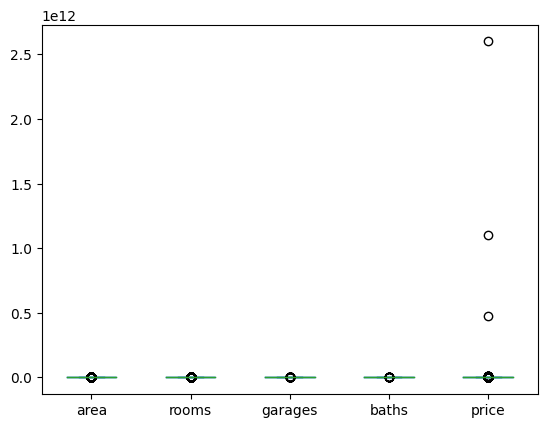

In [ ]:
data.plot(kind='box')

In [ ]:
#Filtramos y corregimos Outlayers
data = data[data['price'] < 1000000000]
data = data[data['area'] < 3000]

<Axes: >

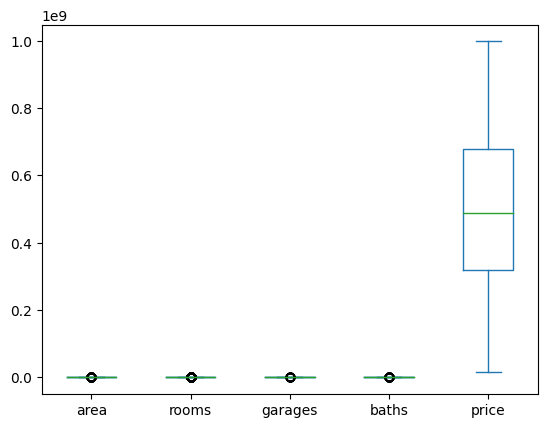

In [ ]:
data.plot(kind='box')

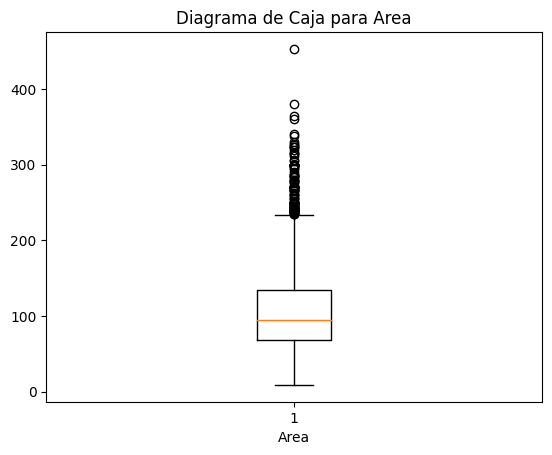

In [ ]:
area= data['area']

plt.boxplot(area, vert=True)  # "vert=False" para un diagrama de caja horizontal
plt.xlabel('Area')  # Etiqueta del eje x (opcional)
plt.title('Diagrama de Caja para Area')  # Título del gráfico (opcional)
plt.show()

<Axes: >

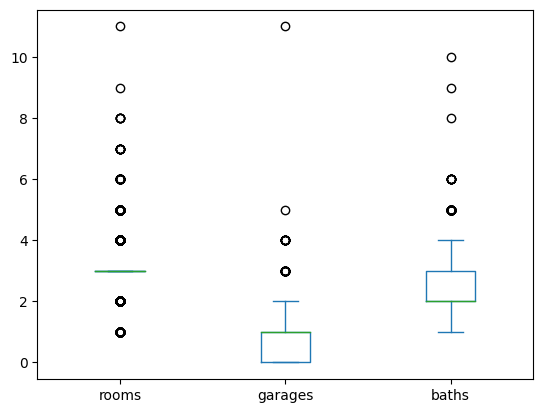

In [ ]:
room = data.drop("price", axis = 1)
room = room.drop("area", axis = 1)
room.plot(kind='box')

1.3 Transformación de Datos

In [ ]:
#Sklearn sólo analiza variables numéricas
data = pd.get_dummies(data, columns=['is_new','stratum','property_type','neighbourhood','city'], drop_first=False)
data.head()

,area,rooms,garages,baths,price,is_new_False,stratum_Campestre,stratum_Estrato 0,stratum_Estrato 1,stratum_Estrato 2,...,neighbourhood_Simón Bolivar,neighbourhood_Urbanizacion doña maria robledo,neighbourhood_Urbanizacion vegas del poblado,neighbourhood_Zuñiga,city_El Retiro,city_Envigado,city_Itaguí,city_La estrella,city_Medellín,city_Otros Municipios
0,72,3,1,2,285000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,135,3,1,2,600000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,185,4,1,4,400000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,137,3,1,3,560000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,88,3,1,2,410000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


1.4 División 70 / 30

<Axes: ylabel='Frequency'>

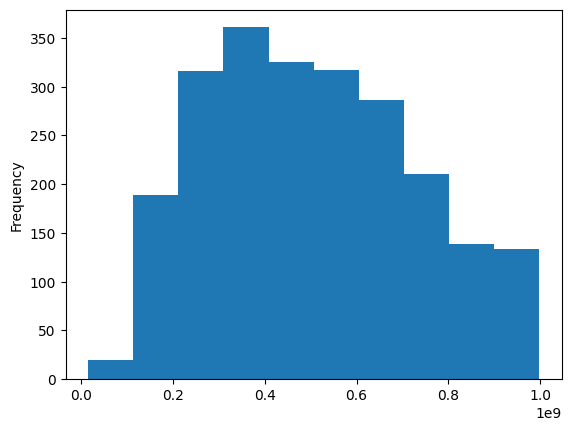

In [ ]:
#División 70-30
from sklearn.model_selection import train_test_split
X = data.drop("price", axis = 1) # Variables predictoras
Y = data['price'] #Variable objetivo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
Y_train.plot(kind='hist')

# 2. Validación Cruzada: Aprendizaje y Evaluación.

In [ ]:
#  Arbol
from sklearn.tree import DecisionTreeRegressor
modelTree = DecisionTreeRegressor(criterion='friedman_mse', min_samples_leaf=10, max_depth=None)

modelTree.fit(X_train, Y_train) #70% train

DecisionTreeRegressor(criterion='friedman_mse', min_samples_leaf=10)

In [ ]:
#Evaluación del árbol 30%
from sklearn import metrics
Y_predArbol = modelTree.predict(X_test) #30%

#Dataframe para comparar los resultados
medidas= pd.DataFrame(index=['mse','rmse','mae','mape','max'])

mse = metrics.mean_squared_error(Y_test,Y_predArbol)
rmse = np.sqrt(mse)
mae= metrics.mean_absolute_error(Y_test,Y_predArbol)
mape=metrics.mean_absolute_percentage_error(Y_test,Y_predArbol)
max=metrics.max_error(Y_test,Y_predArbol)
medidas['Arbol']=[mse, rmse, mae, mape,max]
medidas

,Arbol
mse,1.376962e+16
rmse,1.173440e+08
mae,8.586412e+07
mape,1.790539e-01
max,5.009091e+08


<ipython-input-28-87848e704cdc>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)


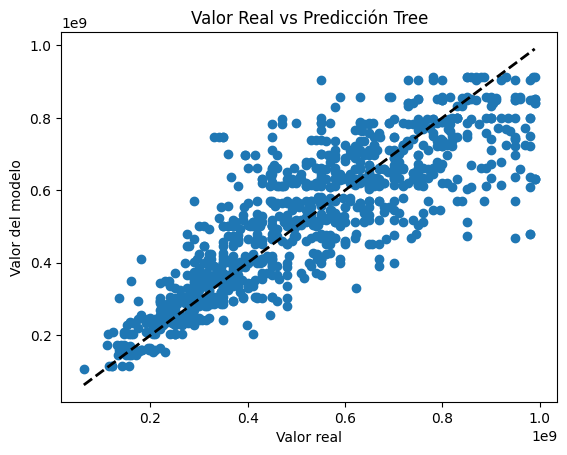

In [ ]:
#Gráfica Valor Real vs Predicción
plt.scatter(Y_test, Y_predArbol)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)
plt.xlabel('Valor real')
plt.ylabel('Valor del modelo')
plt.title('Valor Real vs Predicción Tree')
plt.show() # Mostrar la grafica luego de que ya se definio todos los elementos

In [ ]:
#  Arbol
from sklearn.tree import DecisionTreeRegressor
modelTree = DecisionTreeRegressor(criterion='friedman_mse', min_samples_leaf=10, max_depth=None)

#Validación Cruzada: division, aprendizaje, evaluacion
from sklearn.model_selection import cross_validate
scores = cross_validate(modelTree, X, Y, cv=10, scoring='neg_mean_squared_error', return_train_score=False, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe
scores

,fit_time,score_time,test_score
0,0.020682,0.003154,-1.050573e+16
1,0.016042,0.004204,-1.392020e+16
2,0.015436,0.002750,-1.259116e+16
3,0.015674,0.003124,-1.324779e+16
4,0.016035,0.003326,-1.097385e+16
5,0.021627,0.004037,-1.201084e+16
6,0.014990,0.002849,-1.521240e+16
7,0.020077,0.003121,-1.327737e+16
8,0.016114,0.003068,-1.397640e+16
9,0.015279,0.003269,-1.253488e+16


In [ ]:
#Normalizacion las variables numéricas (las dummies no se normalizan)
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
variables_norm=['area',	'rooms','baths','garages']
min_max_scaler.fit(data[variables_norm]) #Ajuste de los parametros: max - min

#Se aplica la normalización a 70%  y el 30% se normaliza posteriormente
X_train[variables_norm]= min_max_scaler.transform(X_train[variables_norm]) #70%
X_train.head()

,area,rooms,garages,baths,is_new_False,stratum_Campestre,stratum_Estrato 0,stratum_Estrato 1,stratum_Estrato 2,stratum_Estrato 3,...,neighbourhood_Simón Bolivar,neighbourhood_Urbanizacion doña maria robledo,neighbourhood_Urbanizacion vegas del poblado,neighbourhood_Zuñiga,city_El Retiro,city_Envigado,city_Itaguí,city_La estrella,city_Medellín,city_Otros Municipios
7759,0.132883,0.2,0.090909,0.111111,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
7284,0.200450,0.2,0.181818,0.111111,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4055,0.216216,0.2,0.090909,0.111111,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7158,0.171171,0.1,0.000000,0.111111,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
145,0.150901,0.2,0.090909,0.111111,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#KNN
from sklearn.neighbors  import KNeighborsRegressor
modelKnn = KNeighborsRegressor(n_neighbors=13, metric='euclidean')
modelKnn.fit(X_train, Y_train) #70% train

KNeighborsRegressor(metric='euclidean', n_neighbors=13)

             Arbol           Knn
mse   1.376962e+16  7.815994e+16
rmse  1.173440e+08  2.795710e+08
mae   8.586412e+07  2.347684e+08
mape  1.790539e-01  7.605079e-01
max   5.009091e+08  6.027692e+08


<ipython-input-32-ff0b04431ff5>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)


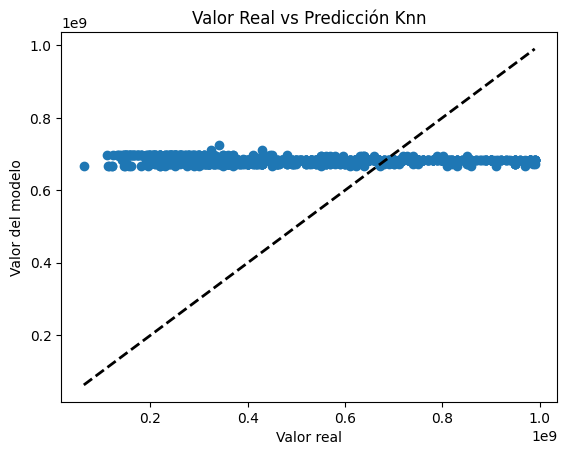

In [ ]:
#Evaluación de Knn 30%
from sklearn import metrics

Y_pred = modelKnn.predict(X_test) #30%

#Medidas de error
mse = metrics.mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
mae= metrics.mean_absolute_error(Y_test,Y_pred)
mape=metrics.mean_absolute_percentage_error(Y_test,Y_pred)
max=metrics.max_error(Y_test,Y_pred)
medidas['Knn']=[mse, rmse, mae, mape,max]
print(medidas)

#Gráfica Valor Real vs Predicción
plt.scatter(Y_test, Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)
plt.xlabel('Valor real')
plt.ylabel('Valor del modelo')
plt.title('Valor Real vs Predicción Knn')
plt.show()

In [ ]:
#KNN
from sklearn.neighbors  import KNeighborsRegressor
modelKnn = KNeighborsRegressor(n_neighbors=13, metric='euclidean')

#Validación Cruzada: division, aprendizaje, evaluacion
from sklearn.model_selection import cross_validate
scores = cross_validate(modelKnn, X, Y, cv=10, scoring='neg_mean_squared_error', return_train_score=False, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe
scores

,fit_time,score_time,test_score
0,0.009832,0.045837,-1.455953e+16
1,0.009952,0.032066,-1.564104e+16
2,0.010496,0.032707,-1.340950e+16
3,0.010141,0.056601,-1.354128e+16
4,0.010236,0.032145,-1.458497e+16
5,0.010399,0.032607,-1.319541e+16
6,0.010288,0.031788,-1.503081e+16
7,0.010219,0.032716,-1.638661e+16
8,0.010036,0.031864,-1.482479e+16
9,0.010996,0.034270,-1.486026e+16


<ipython-input-34-2033f68cbb5c>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)


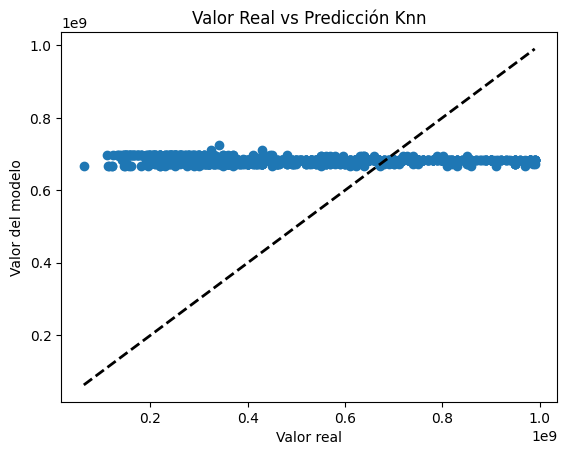

In [ ]:
#Gráfica Valor Real vs Predicción
plt.scatter(Y_test, Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)
plt.xlabel('Valor real')
plt.ylabel('Valor del modelo')
plt.title('Valor Real vs Predicción Knn')
plt.show()

In [ ]:
#Red Neuronal

from sklearn.neural_network import MLPRegressor
modelNN = MLPRegressor(random_state=1,solver='sgd',learning_rate='adaptive',learning_rate_init=0.2,momentum=0.5,activation='relu',hidden_layer_sizes=10,max_iter=5000)

modelNN.fit(X_train, Y_train) #70% train

MLPRegressor(hidden_layer_sizes=10, learning_rate='adaptive',
             learning_rate_init=0.2, max_iter=5000, momentum=0.5,
             random_state=1, solver='sgd')

             Arbol           Knn                      NN
mse   1.376962e+16  7.815994e+16  4.9224668035824376e+16
rmse  1.173440e+08  2.795710e+08         221866329.20708
mae   8.586412e+07  2.347684e+08        187171716.692697
mape  1.790539e-01  7.605079e-01                0.497898
max   5.009091e+08  6.027692e+08        484335631.907742


<ipython-input-36-b1de5b76dbf9>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)


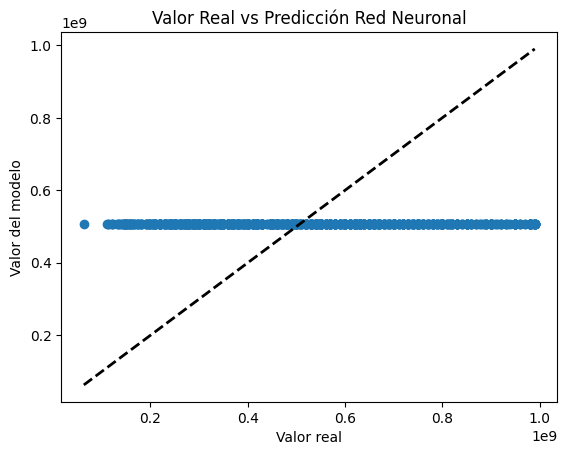

In [ ]:
#Evaluación de NN con el 30%
from sklearn import metrics

Y_pred = modelNN.predict(X_test) #30%

#Medidas de error
mse = metrics.mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
mae= metrics.mean_absolute_error(Y_test,Y_pred)
mape=metrics.mean_absolute_percentage_error(Y_test,Y_pred)
max=metrics.max_error(Y_test,Y_pred)
medidas['NN']=[format(mse), rmse, mae, mape,max]
print(medidas)

#Gráfica Valor Real vs Predicción
plt.scatter(Y_test, Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)
plt.xlabel('Valor real')
plt.ylabel('Valor del modelo')
plt.title('Valor Real vs Predicción Red Neuronal')
plt.show()

In [ ]:
#NN
from sklearn.neural_network import MLPRegressor
modelNN = MLPRegressor(random_state=1,solver='sgd',learning_rate='adaptive',learning_rate_init=0.2,momentum=0.5,activation='relu',hidden_layer_sizes=10,max_iter=5000)

#Validación Cruzada: division, aprendizaje, evaluacion
from sklearn.model_selection import cross_validate
scores = cross_validate(modelNN, X, Y, cv=10, scoring='neg_mean_squared_error', return_train_score=False, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe
scores

,fit_time,score_time,test_score
0,0.714061,0.004117,-5.229702e+16
1,1.052876,0.004122,-5.113768e+16
2,1.055152,0.006042,-5.372668e+16
3,0.714012,0.004141,-4.678255e+16
4,0.745917,0.003370,-5.099824e+16
5,0.703937,0.004042,-4.878690e+16
6,0.756670,0.003421,-5.481967e+16
7,1.160556,0.003553,-5.253195e+16
8,0.860374,0.004577,-4.904936e+16
9,0.927919,0.004594,-4.305878e+16


In [ ]:
#Linear Regressor
from sklearn.linear_model import LinearRegression
modelReg = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=150)
modelReg.fit(X_train, Y_train) #70% train

LinearRegression(n_jobs=150)

             Arbol           Knn                      NN      modelReg
mse   1.376962e+16  7.815994e+16  4.9224668035824376e+16  2.130099e+38
rmse  1.173440e+08  2.795710e+08         221866329.20708  1.459486e+19
mae   8.586412e+07  2.347684e+08        187171716.692697  4.650310e+17
mape  1.790539e-01  7.605079e-01                0.497898  2.583505e+09
max   5.009091e+08  6.027692e+08        484335631.907742  4.580554e+20


<ipython-input-39-0384a03fdb44>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)


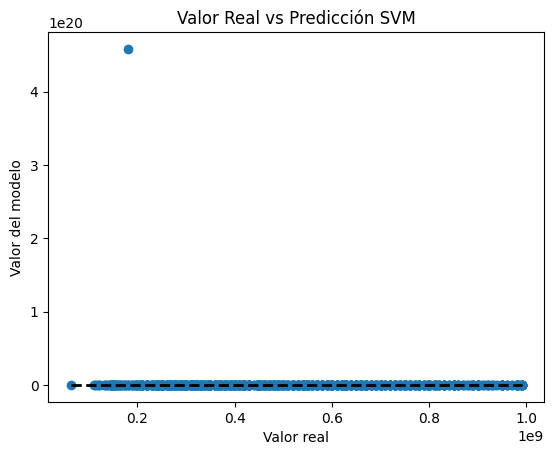

In [ ]:
#Evaluación de LinearRegressor con el 30%

from sklearn import metrics

Y_pred = modelReg.predict(X_test) #30%

#Medidas de error
mse = metrics.mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
mae= metrics.mean_absolute_error(Y_test,Y_pred)
mape=metrics.mean_absolute_percentage_error(Y_test,Y_pred)
max=metrics.max_error(Y_test,Y_pred)
medidas['modelReg']=[mse, rmse, mae, mape,max]
print(medidas)

#Gráfica Valor Real vs Predicción
plt.scatter(Y_test, Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)
plt.xlabel('Valor real')
plt.ylabel('Valor del modelo')
plt.title('Valor Real vs Predicción SVM')
plt.show()

In [ ]:
#Linear Regressor
from sklearn.linear_model import LinearRegression
modelReg = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=150)

#Validación Cruzada: division, aprendizaje, evaluacion
from sklearn.model_selection import cross_validate
scores = cross_validate(modelReg, X, Y, cv=10, scoring='neg_mean_squared_error', return_train_score=False, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe
scores

,fit_time,score_time,test_score
0,0.036752,0.009371,-1.433838e+31
1,0.052306,0.008737,-1.364837e+16
2,0.069504,0.013284,-1.038615e+16
3,0.094598,0.014964,-1.146668e+16
4,0.093735,0.013511,-1.036255e+16
5,0.095020,0.016123,-1.097865e+16
6,0.097544,0.013288,-1.806641e+32
7,0.115496,0.008832,-1.148028e+16
8,0.104557,0.008809,-1.765295e+16
9,0.108160,0.008533,-1.219680e+35


# 5. Ensambles



# Random Forest (Bagging)



In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
model_rf= RandomForestRegressor(n_estimators=100,  max_samples=0.7, criterion='friedman_mse',
                              max_depth=None, min_samples_leaf=2)

#Validación Cruzada: division, aprendizaje, evaluacion
from sklearn.model_selection import cross_validate
scores = cross_validate(model_rf, X, Y, cv=10, scoring='neg_mean_squared_error', return_train_score=False, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe
scores

,fit_time,score_time,test_score
0,1.437877,0.013940,-9.493154e+15
1,0.955071,0.013105,-1.227471e+16
2,0.940295,0.011981,-9.887652e+15
3,0.924859,0.011707,-1.077644e+16
4,0.924642,0.012060,-1.004867e+16
5,0.939591,0.013343,-1.017372e+16
6,0.947552,0.012845,-1.315691e+16
7,0.959194,0.012027,-1.049502e+16
8,0.917303,0.015430,-1.266370e+16
9,1.068175,0.013241,-1.133127e+16


# Boosting

In [ ]:
#Boosting
from sklearn.ensemble import AdaBoostRegressor
modelo_base=DecisionTreeRegressor(criterion='friedman_mse', min_samples_leaf=2)
model_boos = AdaBoostRegressor(modelo_base, n_estimators=50)
model_boos.fit(X_train, Y_train)#70%

Y_pred = model_boos.predict(X_test)#  30%

#Dataframe para comparar los resultados
mse = metrics.mean_squared_error(Y_test,Y_pred) # Entre mas pequeño mejor
rmse = np.sqrt(mse) #diferencia entre el valor real y la prediccion
mae= metrics.mean_absolute_error(Y_test,Y_pred) #diferencia entre el valor real y la prediccion
mape=metrics.mean_absolute_percentage_error(Y_test,Y_pred) # error en porcentaje
max=metrics.max_error(Y_test,Y_pred)
medidas['AdaBoost']=[mse, rmse, mae, mape,max]
medidas

,Arbol,Knn,NN,modelReg,AdaBoost
mse,1.376962e+16,7.815994e+16,4.9224668035824376e+16,2.130099e+38,1.847128e+17
rmse,1.173440e+08,2.795710e+08,221866329.20708,1.459486e+19,4.297822e+08
mae,8.586412e+07,2.347684e+08,187171716.692697,4.650310e+17,3.715929e+08
mape,1.790539e-01,7.605079e-01,0.497898,2.583505e+09,9.565249e-01
max,5.009091e+08,6.027692e+08,484335631.907742,4.580554e+20,9.750000e+08


In [ ]:
#Boosting
from sklearn.ensemble import AdaBoostRegressor
modelo_base=DecisionTreeRegressor(criterion='friedman_mse', min_samples_leaf=2)
model_boos = AdaBoostRegressor(modelo_base, n_estimators=50)

#Validación Cruzada: division, aprendizaje, evaluacion
from sklearn.model_selection import cross_validate
scores = cross_validate(model_boos, X, Y, cv=10, scoring='neg_mean_squared_error', return_train_score=False, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe
scores

,fit_time,score_time,test_score
0,1.470440,0.015680,-9.292053e+15
1,0.685584,0.012831,-1.339561e+16
2,0.673856,0.012290,-1.007400e+16
3,0.668422,0.013077,-1.097969e+16
4,0.830080,0.013505,-1.018685e+16
5,0.719419,0.012636,-1.057920e+16
6,0.663172,0.013066,-1.322256e+16
7,1.051565,0.019538,-1.046560e+16
8,1.088409,0.023836,-1.228137e+16
9,1.115298,0.019479,-1.123110e+16


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

regresores=[('dt', modelTree), ('knn', modelKnn), ('net', modelNN)]

metodo_ensamblador= LinearRegression()

#metodo_ensamblador = SVC(kernel='linear', probability=True) #'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'

model_stack= StackingRegressor(estimators=regresores, final_estimator=metodo_ensamblador)
model_stack.fit(X_train,Y_train)#70%

Y_pred = model_stack.predict(X_test)#  30%
#Dataframe para comparar los resultados
mse = metrics.mean_squared_error(Y_test,Y_pred) # Entre mas pequeño mejor
rmse = np.sqrt(mse) #diferencia entre el valor real y la prediccion
mae= metrics.mean_absolute_error(Y_test,Y_pred) #diferencia entre el valor real y la prediccion
mape=metrics.mean_absolute_percentage_error(Y_test,Y_pred) # error en porcentaje
max=metrics.max_error(Y_test,Y_pred)
medidas['Stacking']=[mse, rmse, mae, mape,max]
medidas

,Arbol,Knn,NN,modelReg,AdaBoost,Stacking
mse,1.376962e+16,7.815994e+16,4.9224668035824376e+16,2.130099e+38,1.847128e+17,1.093295e+17
rmse,1.173440e+08,2.795710e+08,221866329.20708,1.459486e+19,4.297822e+08,3.306501e+08
mae,8.586412e+07,2.347684e+08,187171716.692697,4.650310e+17,3.715929e+08,2.873687e+08
mape,1.790539e-01,7.605079e-01,0.497898,2.583505e+09,9.565249e-01,8.914972e-01
max,5.009091e+08,6.027692e+08,484335631.907742,4.580554e+20,9.750000e+08,6.887356e+08


# 6. Hiperparametrización

In [ ]:
#Hiperparametrización
from sklearn.model_selection import GridSearchCV

In [ ]:
#  Arbol
from sklearn.tree import DecisionTreeRegressor
modelTree = DecisionTreeRegressor()

# Definir los hiperparametros
criterion=['squared_error','friedman_mse'] #Indice de información
min_samples_leaf=[5,10,15,20,25,40] # Cantidad de registros por hoja
max_depth=[None, 10,20, 50,80,100] #Niveles de profundidad

#Grid
param_grid = dict(criterion=criterion, min_samples_leaf=min_samples_leaf, max_depth=max_depth)
grid = GridSearchCV(estimator=modelTree, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=3)
grid.fit(X_train, Y_train)

#Mejor modelo
modelTree= grid.best_estimator_

#Medida de evaluación del mejor modelo
medidas_CV= pd.DataFrame(index=['MSE'])
medidas_CV['Tree']=grid.best_score_

# Mejores párametros
print( grid.best_params_)

print(medidas_CV)

{'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 15}
             Tree
MSE -1.353004e+16


In [ ]:
#  AdaBoost
from sklearn.ensemble import AdaBoostRegressor
modelo_base_1=DecisionTreeRegressor(criterion='friedman_mse', min_samples_leaf=2)
modelo_base_2=LinearRegression(fit_intercept=True, copy_X=True, n_jobs=150)
modelo_base_3= KNeighborsRegressor(n_neighbors=1, metric='euclidean')

model_boos = AdaBoostRegressor()
bases=[modelo_base_1,modelo_base_2,modelo_base_3]
n_estimators=[20, 50,80,100,150]

#Grid
param_grid = dict(base_estimator=bases, n_estimators=n_estimators)
grid = GridSearchCV(estimator=model_boos, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=10)

grid.fit(X_train, Y_train)

#Mejor modelo
modelTree= grid.best_estimator_

#Medida de evaluación del mejor modelo
medidas_CV= pd.DataFrame(index=['MSE'])
medidas_CV['RandomF']=grid.best_score_

# Mejores párametros
print( grid.best_params_)

print(medidas_CV)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


{'base_estimator': DecisionTreeRegressor(criterion='friedman_mse', min_samples_leaf=2), 'n_estimators': 100}
          RandomF
MSE -1.112707e+16


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rf= RandomForestRegressor(n_estimators=100,  max_samples=0.7, criterion='friedman_mse',
                              max_depth=None, min_samples_leaf=2)

In [ ]:
#  RandomForest
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()

# Definir los hiperparametros
n_estimators=[170,180,190] #Indice de información
max_samples=[0.7,0.8] # Cantidad de registros por hoja
criterion=['squared_error','friedman_mse'] #Indice de información
max_depth=[5,10,15] #Niveles de profundidad
min_samples_leaf=[2,5,8] # Cantidad de registros por hoja


#Grid
param_grid = dict(n_estimators=n_estimators, max_samples=max_samples, criterion=criterion, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
grid = GridSearchCV(estimator=model_rf, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=10)

grid.fit(X_train, Y_train)

#Mejor modelo
modelTree= grid.best_estimator_

#Medida de evaluación del mejor modelo
medidas_CV= pd.DataFrame(index=['MSE'])
medidas_CV['RandomF']=grid.best_score_

# Mejores párametros
print( grid.best_params_)

print(medidas_CV)


{'criterion': 'squared_error', 'max_depth': 10, 'max_samples': 0.7, 'min_samples_leaf': 2, 'n_estimators': 190}
          RandomF
MSE -1.100811e+16


# Se entrena el mejor modelo con el 100% de los datos

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
model_rf= RandomForestRegressor(n_estimators=190,  max_samples=0.7, criterion='squared_error',
                              max_depth=10, min_samples_leaf=2)
model_rf.fit(X,Y)

RandomForestRegressor(max_depth=10, max_samples=0.7, min_samples_leaf=2,
                      n_estimators=190)

# 5. Guardamos el modelo

In [ ]:
import pickle
filename = 'Modelo-Venta.pkl'
variables= X.columns._values
pickle.dump([model_rf,variables], open(filename, 'wb')) #write